In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Import Linear dataset

In [3]:
df1=pd.read_csv('linear_data.csv')
df1.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [9]:
x_linear=df1[['x']]
y_linear=df1[['y']]

# Import Non-linear dataset

In [7]:
df2=pd.read_csv('nonlinear_data.csv')
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [8]:
x_nonlinear=df2[['x']]
y_nonlinear=df2[['y']]

# Visual Representation 

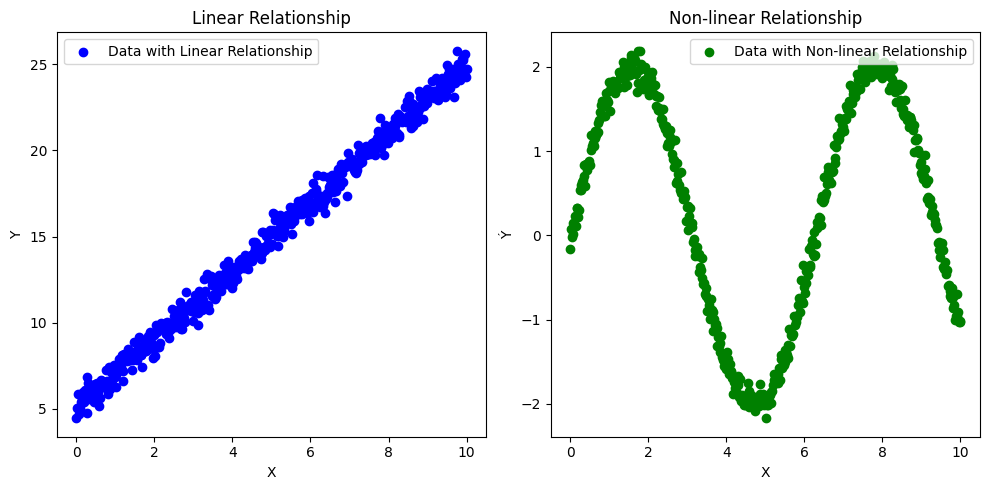

In [10]:
# linear
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x_linear,y_linear,color='blue', label='Data with Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

#non_linear

plt.subplot(1,2,2)
plt.scatter(x_nonlinear,y_nonlinear,color='green',label='Data with Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Ý')
plt.title('Non-linear Relationship')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
df1.corr() #linear

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [12]:
df2.corr() #non_linear

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


# Linear

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
reg1=LinearRegression()

In [15]:
reg1.fit(x_linear,y_linear) #for train model # x=x_linear.reshape(-1,1)

LinearRegression()

In [16]:
reg1.score(x_linear,y_linear)

0.9928923730526016

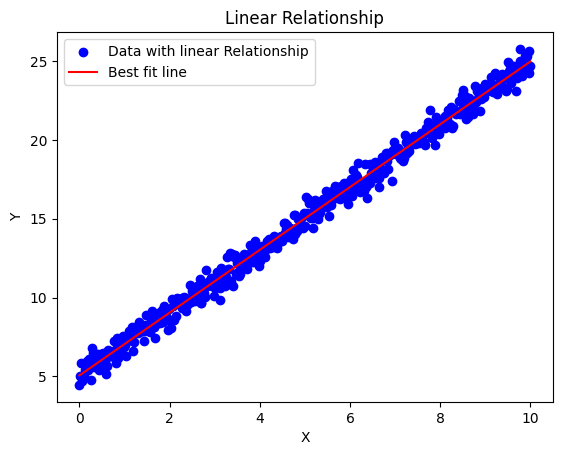

In [20]:
plt.scatter(x_linear,y_linear,color='blue',label='Data with linear Relationship')
plt.plot(x_linear,reg1.predict(x_linear),color='red',label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

# Non linear

In [22]:
reg2=LinearRegression()

In [23]:
reg2.fit(x_nonlinear,y_nonlinear)

LinearRegression()

In [24]:
reg2.score(x_nonlinear,y_nonlinear) 

0.004321199719043656

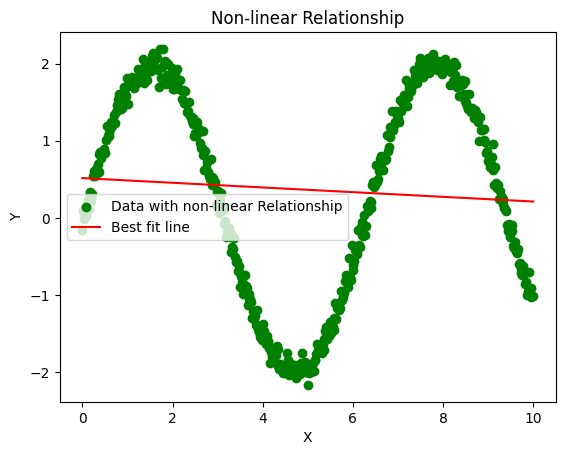

In [26]:
plt.scatter(x_nonlinear,y_nonlinear, color='green',label='Data with non-linear Relationship')
plt.plot(x_nonlinear,reg2.predict(x_nonlinear),color='red',label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

# Polynomial Regression 

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly= PolynomialFeatures(degree=6) #polynomial regression with dgree=6
x_poly=poly.fit_transform(x_nonlinear)

In [30]:
x_poly.shape

(500, 7)

In [31]:
reg_poly=LinearRegression()

In [32]:
reg_poly.fit(x_poly,y_nonlinear)

LinearRegression()

In [33]:
reg_poly.score(x_poly,y_nonlinear)

0.9930624844497353

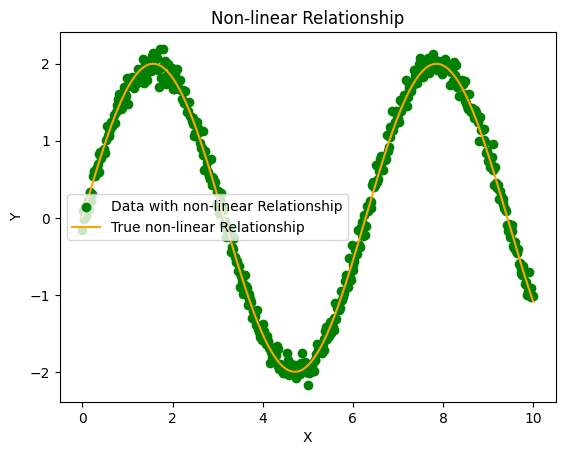

In [34]:
plt.scatter(x_nonlinear,y_nonlinear, color='green',label='Data with non-linear Relationship')
plt.plot(x_nonlinear,2*np.sin(x_nonlinear),color='orange',label='True non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

# Seperate Train Test

In [36]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_poly,y_nonlinear, test_size=.30, random_state=1 )

In [37]:
reg = LinearRegression()

In [38]:
reg.fit(xtrain, ytrain)

LinearRegression()

# Testing score

In [39]:
reg.score(xtest, ytest)

0.9905664282629504

# Training score 

In [41]:
reg.score(xtrain, ytrain) 

0.9939293669434804